# 泰坦尼克号数据集调查

## 1 查看数据集结构

In [27]:
import pandas as pd

file_path = './titanic-data.csv'
original_df = pd.read_csv(file_path)
original_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### [Kaggle网站](https://www.kaggle.com/c/titanic/data)上的数据集结构说明：

**Data Dictionary**

|Variable|Definition|Key|
|:-|:-|:-|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||	
|Age|Age in years||	
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||	
|fare|Passenger fare||	
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|


**Variable Notes**

**pclass**: A proxy for socio-economic status (SES)
<br>1st = Upper
<br>2nd = Middle
<br>3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
<br>Sibling = brother, sister, stepbrother, stepsister
<br>Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
<br>Parent = mother, father
<br>Child = daughter, son, stepdaughter, stepson
<br>Some children travelled only with a nanny, therefore parch=0 for them.


In [28]:
# 数据行数
print len(original_df)

891


## 2 定义调查问题 
### 2.1 有哪些因素会让船上的人生还率更高？
* 舱位等级（Pclass）
* 年龄
* 性别
* 有亲属同船的
* 登船港口

### 2.2 有哪些因素与社会地位/舱位（Pclass）相关?
* 年龄
* 性别
* 有亲属同船
* 登船港口

## 3 数据加工（缺失数据处理）
### 3.1 查看各列缺失值数量

In [29]:
print '%16s    %s' % ('列名', '缺失值数量')
print '='*30
for col in original_df:
    print '%16s    %d' % (col,sum(original_df[col].isna()))


          列名    缺失值数量
     PassengerId    0
        Survived    0
          Pclass    0
            Name    0
             Sex    0
             Age    177
           SibSp    0
           Parch    0
          Ticket    0
            Fare    0
           Cabin    687
        Embarked    2


从初步调查看：
- 缺失值最多的是舱号（Cabin），由于调查问题中不涉及该列, 可不做处理
- 年龄（Age）缺失值较多, 而港口（Embarked）缺失值较少，可以查看缺港口的是否同时缺年龄

In [30]:
# 查看港口和年龄同时缺失的记录数
print sum(original_df['Embarked'].isna() & original_df['Age'].isna())

0


### 3.2 处理缺失数据

In [31]:
valid_age_df = original_df.loc[original_df['Age'].notna()]
valid_harbour_df = original_df.loc[original_df['Embarked'].notna()]
# 验证记录数
print len(valid_age_df)
print len(valid_harbour_df)

714
889


## 4 调查数据
### 4.1 描述数据

In [32]:
if True:
    print original_df['Survived'].describe(),'\n'

if True:
    print original_df['Pclass'].describe(),'\n'

if True:
    print valid_age_df['Age'].describe(),'\n'
    
if True:
    print original_df['Sex'].describe(),'\n'
    
if True:
    print original_df['SibSp'].describe(),'\n'
    
if True:
    print original_df['Parch'].describe(),'\n'
    
if True:
    print original_df['Fare'].describe(),'\n'
    
if True:
    print valid_harbour_df['Embarked'].describe(),'\n'

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64 

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64 

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object 

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64 

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        

### 4.2 调查问题1：有哪些因素会让船上的人生还率更高？
#### 4.2.1 舱位等级（Pclass）

In [33]:
# 总体生存率情况
original_df['Survived'].describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [34]:
# 不同舱位等级成员的生存率情况
original_df.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


Populating the interactive namespace from numpy and matplotlib


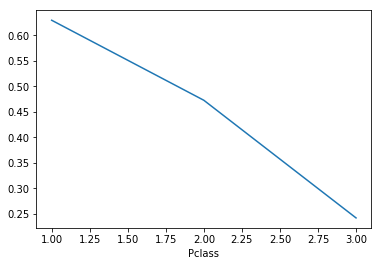

In [35]:
%pylab inline
original_df.groupby('Pclass')['Survived'].mean().plot()

In [52]:
# 视不同舱位等级的人员为各自独立样本
from scipy.stats import ttest_ind, ttest_1samp

class_1 = original_df[original_df['Pclass']==1]['Survived']
class_2 = original_df[original_df['Pclass']==2]['Survived']
class_3 = original_df[original_df['Pclass']==3]['Survived']

print '各样本与总体均数比较' 
print 'H0: 样本n的生存率与总体生存率相同'
print 'H1: 样本n的生存率与总体生存率不同'
print 'α=0.05，单侧t检验'
print '='*30
print 'class_1: ', ttest_1samp(class_1, original_df['Survived'].mean())
print 'class_2: ', ttest_1samp(class_2, original_df['Survived'].mean())
print 'class_3: ', ttest_1samp(class_3, original_df['Survived'].mean())

print ''

print '各样本两两比较'
print 'H0: 样本A的生存率与样本B的生存率相同'
print 'H1: 样本A的生存率与样本B的生存率不同'
print 'α=0.05，单侧t检验'
print '='*30
print 'class_1 vs class_2: ', ttest_ind(class_1, class_2)
print 'class_2 vs class_3: ', ttest_ind(class_2, class_3)
print 'class_1 vs class_3: ', ttest_ind(class_1, class_3)

各样本与总体均数比较
H0: 样本n的生存率与总体生存率相同
H1: 样本n的生存率与总体生存率不同
α=0.05，单侧t检验
class_1:  Ttest_1sampResult(statistic=7.4631976656913208, pvalue=2.0696038884307953e-12)
class_2:  Ttest_1sampResult(statistic=2.411170223196581, pvalue=0.016890381946305565)
class_3:  Ttest_1sampResult(statistic=-7.3083092995905927, pvalue=1.1069172439274134e-12)

各样本两两比较
H0: 样本A的生存率与样本B的生存率相同
H1: 样本A的生存率与样本B的生存率不同
α=0.05，单侧t检验
class_1 vs class_2:  Ttest_indResult(statistic=3.1786140523324851, pvalue=0.0015954656668372637)
class_2 vs class_3:  Ttest_indResult(statistic=5.9306379718227102, pvalue=4.824799495146526e-09)
class_1 vs class_3:  Ttest_indResult(statistic=10.623796623966948, pvalue=1.4803959119909571e-24)


**结论4.2.1**
- 因为$ P_{class\_1} = 2.070*10^{-12} < 0.10^{[*]} $、$ P_{class\_2} = 0.017 < 0.10 $、 $ P_{class\_3} = 1.107*10^{-12} < 0.10 $，故按 $α=0.05$ 水平，拒绝 $ H_0 $，接受 $ H_1 $，即不同舱位等级乘员的生存率与总体生存率不同，一等舱和二等舱的生存率高于总体生存率，三等舱的生存率低于总体生存率。
- 因为$ P_{class\_1/class\_2} = 0.002 < 0.10 $、$ P_{class\_2/class\_3} = 4.825*10^{-9} < 0.10 $、 $ P_{class\_1/class\_3} = 1.480*10^{-24} < 0.10 $，故按 $α=0.05$ 水平，拒绝 $ H_0 $，接受 $ H_1 $，即不同舱位等级的乘客生存率不同，一等舱生存率高于二等舱生存率高于三等舱生存率

[\*] 计算结果为双侧

#### 4.2.2 年龄（Age）

In [37]:
# 查看年龄分布情况
valid_age_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [38]:
# 按年龄每10岁为一组，分为 8 组：
valid_age_df['Agegroup'] = valid_age_df['Age'].apply(lambda x: (x - 0.001)//10)

c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
valid_age_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Agegroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0


In [41]:
valid_age_and_harbour_df.groupby('Agegroup')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Agegroup,,,,,,,,
0.0,64.0,0.593750,0.495015,0.0,0.0,1.0,1.0,1.0
1.0,115.0,0.382609,0.488151,0.0,0.0,0.0,1.0,1.0
2.0,230.0,0.365217,0.482541,0.0,0.0,0.0,1.0,1.0
3.0,154.0,0.441558,0.498193,0.0,0.0,0.0,1.0,1.0
4.0,86.0,0.383721,0.489143,0.0,0.0,0.0,1.0,1.0
5.0,42.0,0.404762,0.496796,0.0,0.0,0.0,1.0,1.0
6.0,16.0,0.187500,0.403113,0.0,0.0,0.0,0.0,1.0
7.0,5.0,0.200000,0.447214,0.0,0.0,0.0,0.0,1.0


Populating the interactive namespace from numpy and matplotlib


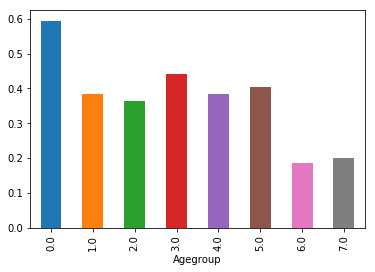

In [47]:
%pylab inline
valid_age_and_harbour_df.groupby('Agegroup')['Survived'].mean().plot.bar()

In [53]:
# 验证10岁以下和60岁以上乘员的平均生存率与总体生存率是否相同
G0= valid_age_df[valid_age_df['Agegroup']==0]['Survived']   # 10岁以下
G1 = valid_age_df[valid_age_df['Agegroup']==1]['Survived']   # 10 ~ 20岁
G2 = valid_age_df[valid_age_df['Agegroup']==2]['Survived']   # 20 ~ 30岁
G3 = valid_age_df[valid_age_df['Agegroup']==3]['Survived']   # 30 ~ 40岁
G4 = valid_age_df[valid_age_df['Agegroup']==4]['Survived']   # 40 ~ 50岁
G5 = valid_age_df[valid_age_df['Agegroup']==5]['Survived']   # 50 ~ 60岁
G6 = valid_age_df[valid_age_df['Agegroup']==6]['Survived']   # 60 ~ 70岁
G7 = valid_age_df[valid_age_df['Agegroup']==7]['Survived']   # 70 ~ 80岁

print '各样本与总体均数比较' 
print 'H0: 样本n的生存率与总体生存率相同'
print 'H1: 样本n的生存率与总体生存率不同'
print 'α=0.05，单尾t检验'
print '='*30
print '10岁以下: ', ttest_1samp(G0, valid_age_df['Survived'].mean())
print '10 ~ 20岁: ', ttest_1samp(G1, valid_age_df['Survived'].mean())
print '20 ~ 30岁: ', ttest_1samp(G2, valid_age_df['Survived'].mean())
print '30 ~ 40岁: ', ttest_1samp(G3, valid_age_df['Survived'].mean())
print '40 ~ 50岁: ', ttest_1samp(G4, valid_age_df['Survived'].mean())
print '50 ~ 60岁: ', ttest_1samp(G5, valid_age_df['Survived'].mean())
print '60 ~ 70岁: ', ttest_1samp(G6, valid_age_df['Survived'].mean())
print '70 ~ 80岁: ', ttest_1samp(G7, valid_age_df['Survived'].mean())

各样本与总体均数比较
H0: 样本n的生存率与总体生存率相同
H1: 样本n的生存率与总体生存率不同
α=0.05，单尾t检验
10岁以下:  Ttest_1sampResult(statistic=3.0316269074489375, pvalue=0.0035278697359956961)
10 ~ 20岁:  Ttest_1sampResult(statistic=-0.51743424867834753, pvalue=0.60585563429174139)
20 ~ 30岁:  Ttest_1sampResult(statistic=-1.2868595896229751, pvalue=0.19944252093645054)
30 ~ 40岁:  Ttest_1sampResult(statistic=0.97380009743201446, pvalue=0.33168291549268702)
40 ~ 50岁:  Ttest_1sampResult(statistic=-0.42546668930831599, pvalue=0.67157178922433469)
50 ~ 60岁:  Ttest_1sampResult(statistic=-0.018270420460130162, pvalue=0.98551174843507838)
60 ~ 70岁:  Ttest_1sampResult(statistic=-1.6112719985589989, pvalue=0.12666898151774331)
70 ~ 80岁:  Ttest_1sampResult(statistic=-1.0308123249299719, pvalue=0.36087539994202772)


**结论4.2.2**
- 从上图大致推测10岁以下、60~70岁和70~80岁3个年龄段生存率与其他年龄段生存率差异较明显
- 从t检验结果可得出结论：10岁以下乘员的生存率高于总体生存率，其他年龄段生存率与总体生存率相同

#### 4.2.3 性别（Sex）

#### 4.2.4 有亲属同船的（SibSp, Parch）

#### 4.2.5 登船港口（Embarked）